## Предобработка данных

Для начала импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, mean_squared_log_error
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

Загрузим исходные данные, а также присвоим имена созданным датафреймам.

In [3]:
data_arc = pd.read_csv('/datasets/final_steel/data_arc.csv')
data_arc.name = 'data_arc'

data_bulk = pd.read_csv('/datasets/final_steel/data_bulk.csv')
data_bulk.name = 'data_bulk'

data_bulk_time = pd.read_csv('/datasets/final_steel/data_bulk_time.csv')
data_bulk_time.name = 'data_bulk_time'

data_gas = pd.read_csv('/datasets/final_steel/data_gas.csv')
data_gas.name = 'data_gas'

data_temp = pd.read_csv('/datasets/final_steel/data_temp.csv')
data_temp.name = 'data_temp'

data_wire = pd.read_csv('/datasets/final_steel/data_wire.csv')
data_wire.name = 'data_wire'

data_wire_time = pd.read_csv('/datasets/final_steel/data_wire_time.csv')
data_wire_time.name = 'data_wire_time'

Создадим список `data_all`, включающий все исходные датафреймы.

In [4]:
data_all = [data_arc, data_bulk, data_bulk_time, data_gas, data_temp, data_wire, data_wire_time]

Посмотрим на структуру датафреймов.

In [5]:
for df in data_all:
    display(df.info())
    display(df.head())
    print('____________________________')
    print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


None

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


____________________________


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


____________________________


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


None

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56


____________________________


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


____________________________


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


None

,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


____________________________


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


____________________________


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


None

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


____________________________




Датафреймы содержат столбцы, написанные кириллическими буквами. Для дальнейшего удобства анализа переименуем такие столбцы так, чтобы новые наименовия столбцов содержали только латинские буквы, а роль пробела играло нижнее подчеркивание.

In [6]:
data_arc.rename(columns={'Начало нагрева дугой': 'time_start',
                                    'Конец нагрева дугой': 'time_end',
                                    'Активная мощность': 'active_power',
                                    'Реактивная мощность': 'reactive_power'}, inplace=True)

data_temp.rename(columns={'Время замера': 'time_temperature',
                                      'Температура': 'temperature'}, inplace=True)

data_gas.rename(columns={'Газ 1': 'gas'}, inplace=True)

display(data_temp.head())
display(data_arc.head())
display(data_gas.head())

,key,time_temperature,temperature
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


,key,time_start,time_end,active_power,reactive_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


,key,gas
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


Также заметим, что столбцы начала и конца нагрева дугой (`time_start`, `time_end`), а также время замера температуры (`time_temperature`) содержат неправильный тип данных (`object`). Исправим у данных столбцов тип данных на `datetime`.

In [7]:
for column in ['time_start', 'time_end']:
    data_arc[column] = pd.to_datetime(data_arc[column], format='%Y-%m-%d %H:%M:%S')
    
data_temp['time_temperature'] = pd.to_datetime(data_temp['time_temperature'], format='%Y-%m-%d %H:%M:%S')

display(data_arc.info())
display(data_temp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   key             14876 non-null  int64         
 1   time_start      14876 non-null  datetime64[ns]
 2   time_end        14876 non-null  datetime64[ns]
 3   active_power    14876 non-null  float64       
 4   reactive_power  14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   key               15907 non-null  int64         
 1   time_temperature  15907 non-null  datetime64[ns]
 2   temperature       13006 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 372.9 KB


None

Для датафремов `data_bulk`, `data_wire` и `data_gas` столбцы `key` установим в качестве индекса и проверим результат исправления.

In [8]:
dfs = [data_bulk, data_wire, data_gas]

for df in dfs:
    df.set_index('key', inplace=True)
    print('Наименование индекса датафрейма "{}" - {}'.format(df.name, df.index.name))

Наименование индекса датафрейма "data_bulk" - key
Наименование индекса датафрейма "data_wire" - key
Наименование индекса датафрейма "data_gas" - key


Создадим новый столбец, отражающий продолжительность нагрева в секундах.

In [9]:
data_arc['heating_duration'] = (data_arc['time_end'] - data_arc['time_start']).dt.total_seconds().astype(int)
data_arc.head()

,key,time_start,time_end,active_power,reactive_power,heating_duration
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,228
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,185
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,172
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,365
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,148


Проверим распределение активной и реактивной мощностей у датафрейма `data_temp`.

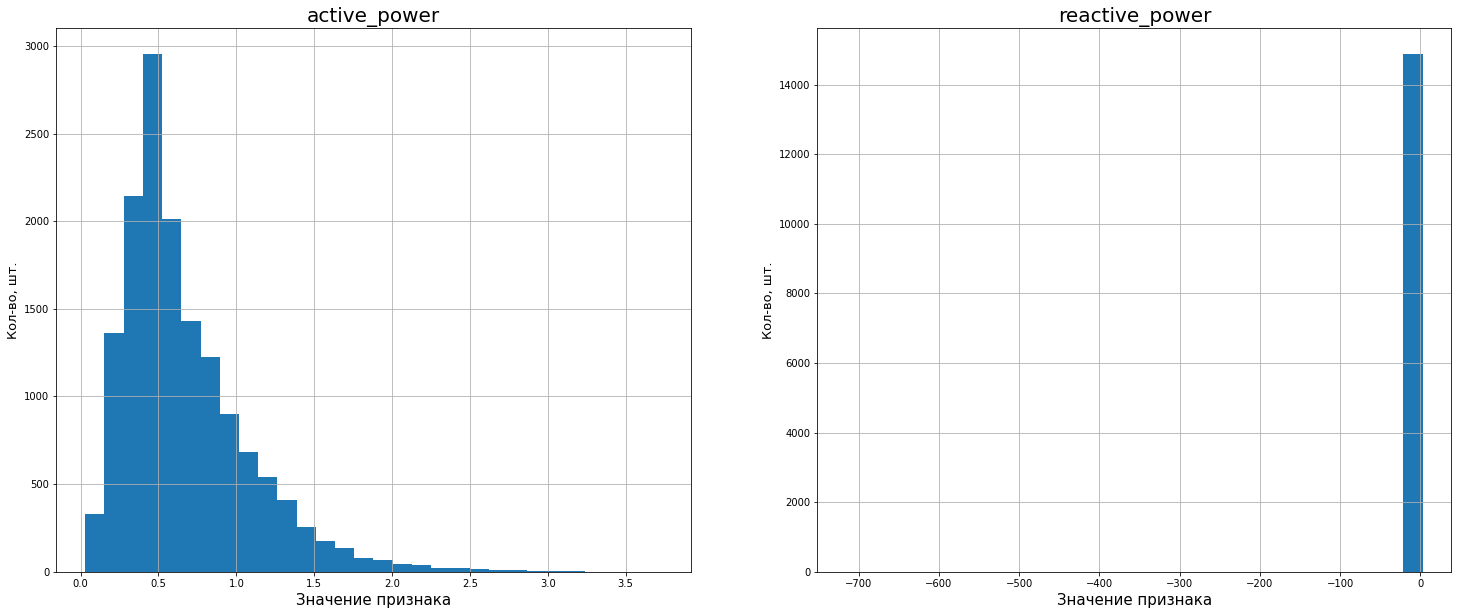

In [10]:
fig = plt.figure(figsize=(25, 10))

cols = 2
rows = 1 
counter = 1
for column in ['active_power', 'reactive_power']:
    ax = plt.subplot(rows, cols, counter)
    plt.xlabel('Значение признака', fontsize=15)
    plt.ylabel('Кол-во, шт.', fontsize=13)
    ax.set_title(column, fontsize=20)
    data_arc[column].hist(bins=30)
    counter += 1
plt.show();

График "reactive_power" имеет аномальный масштаб: на оси абцисс отображены отрицательные значения, что указывает на наличие отрицательных значений в столбце `reactive_power`. Удалим из датафрейма `data_arc` строки, содержащие отрицательные значения в столбце `reactive_power`, и проверим результат исправления.

In [11]:
data_arc = data_arc[data_arc['reactive_power'] >= 0]

print('Количество строк с отрицательными значениями в столбце "reactive_power": {}'
      .format(data_arc[data_arc['reactive_power'] < 0].shape[0]))

Количество строк с отрицательными значениями в столбце "reactive_power": 0


Создадим сводную таблицу `data_arc_pivot`, которая отражает средневзешенные значения активной и реактивной мощностей, где весами являются продолжительность нагрева.

In [12]:
data_arc_pivot = data_arc.pivot_table(values='active_power',
                                      index='key',
                                      aggfunc=lambda rows: np.average(rows, weights=data_arc.loc[rows.index, 'heating_duration']))

data_arc_pivot = data_arc_pivot.merge(data_arc.pivot_table(values='reactive_power',
                                                           index='key',
                                                           aggfunc=lambda rows: np.average(rows, weights=data_arc.loc[rows.index, 'heating_duration'])),
                                      on='key')
data_arc_pivot = data_arc_pivot.rename(columns={'active_power': 'active_power_wavg',
                                                'reactive_power':'reactive_power_wavg'})

data_arc_pivot = data_arc_pivot.merge(data_arc.pivot_table(values='heating_duration',
                                         index='key',
                                         aggfunc='sum'),
                     on='key')
data_arc_pivot

,active_power_wavg,reactive_power_wavg,heating_duration
key,,,
1,1.100004,0.717584,1098
2,0.904829,0.601222,811
3,0.677226,0.428911,655
4,0.905079,0.580210,741
5,1.147867,0.765178,869
...,...,...,...
3237,0.855878,0.615329,909
3238,0.792764,0.637991,546
3239,0.694883,0.458853,1216


Создадим сводную таблицу `data_temp_pivot`, которая отражает температуру начального замера (`start_temperature`) и температуру итогового замера (`end_temperature`).

In [13]:
data_temp_pivot = (data_temp.pivot_table(values='time_temperature',
                                       index='key',
                                       aggfunc=(lambda rows: data_temp.loc[data_temp.index[data_temp['time_temperature'] == rows.min()], 'temperature'],
                                                lambda rows: data_temp.loc[data_temp.index[data_temp['time_temperature'] == rows.max()], 'temperature']))
                  .rename(columns={'<lambda_0>': 'start_temperature','<lambda_1>': 'end_temperature'}))

data_temp_pivot

,start_temperature,end_temperature
key,,
1,1571.0,1613.0
2,1581.0,1602.0
3,1596.0,1599.0
4,1601.0,1625.0
5,1576.0,1602.0
...,...,...
3237,1569.0,NaN
3238,1584.0,NaN
3239,1598.0,NaN


Возможно у некоторых партий обработки (`key`) температура измерялась один раз. Для таких партий нельзя говорить о начальной и итоговой температуре, а точнее такие партии имеют только начальную температуру, но не имеют итоговую. Удалим из сводной таблицы `data_temp_pivot` те строки, которые содержат в столбце `end_temperature` пустые значения (`NaN`).

In [14]:
data_temp_pivot = data_temp_pivot.dropna(subset=['end_temperature'])
data_temp_pivot

,start_temperature,end_temperature
key,,
1,1571.0,1613.0
2,1581.0,1602.0
3,1596.0,1599.0
4,1601.0,1625.0
5,1576.0,1602.0
...,...,...
2495,1570.0,1591.0
2496,1554.0,1591.0
2497,1571.0,1589.0


Объединим таблицы `data_temp_pivot`, `data_arc_pivot`, `data_bulk`, `data_gas` и `data_wire` с помощью метода `.join`.

In [15]:
data_final = (data_temp_pivot.join(data_arc_pivot)
                             .join(data_bulk)
                             .join(data_gas)
                             .join(data_wire))

data_final

,start_temperature,end_temperature,active_power_wavg,reactive_power_wavg,heating_duration,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,gas,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1571.0,1613.0,1.100004,0.717584,1098.0,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0,29.749986,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1581.0,1602.0,0.904829,0.601222,811.0,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0,12.555561,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1596.0,1599.0,0.677226,0.428911,655.0,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0,28.554793,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1601.0,1625.0,0.905079,0.580210,741.0,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0,18.841219,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1576.0,1602.0,1.147867,0.765178,869.0,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0,5.413692,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1570.0,1591.0,0.866068,0.639796,723.0,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,NaN,256.0,NaN,129.0,223.0,7.125735,89.150879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2496,1554.0,1591.0,0.774328,0.516853,940.0,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,122.0,NaN,256.0,NaN,129.0,226.0,9.412616,114.179527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2497,1571.0,1589.0,0.751381,0.627130,569.0,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230.0,NaN,124.0,226.0,6.271699,94.086723,9.04800,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Найдем у итогового датафрейма `data_final` те столбцы, которые содержат пропуски во всех строках. Удалим такие столбцы за ненадобностью.

In [16]:
nan_columns = data_final.columns[data_final.isna().all()].tolist()
print('Столбцы, в которых все значения "NaN": {}'.format(nan_columns))

data_final = data_final.drop(columns=nan_columns)

Столбцы, в которых все значения "NaN": ['Wire 5']


### Проверка на наличие дублей

Будем считать дубликатами те строки, у которых одинаковые значения `key`. Финальный датайфрейм не содержит дубли, т.к. столбец `key` является индексом датафрейма, а значит все его значения уникальны. 

### Предобработка пропущенных значений

Проверим, какие столбцы содержат пропущенные значения.

In [17]:
data_final.columns[data_final.isna().any()].tolist()

['active_power_wavg',
 'reactive_power_wavg',
 'heating_duration',
 'Bulk 1',
 'Bulk 2',
 'Bulk 3',
 'Bulk 4',
 'Bulk 5',
 'Bulk 6',
 'Bulk 7',
 'Bulk 8',
 'Bulk 9',
 'Bulk 10',
 'Bulk 11',
 'Bulk 12',
 'Bulk 13',
 'Bulk 14',
 'Bulk 15',
 'gas',
 'Wire 1',
 'Wire 2',
 'Wire 3',
 'Wire 4',
 'Wire 6',
 'Wire 7',
 'Wire 8',
 'Wire 9']

Пропуски содержатся во всех столбцах, кроме столбцов `start_temperature` и `end_temperature`.

Найдем строки, у которых пропуски в столбцах `active_power_wavg` и `reactive_power_wavg`.

In [18]:
data_final[data_final['active_power_wavg'].isnull() | data_final['reactive_power_wavg'].isnull()]

,start_temperature,end_temperature,active_power_wavg,reactive_power_wavg,heating_duration,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,gas,Wire 1,Wire 2,Wire 3,Wire 4,Wire 6,Wire 7,Wire 8,Wire 9
key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
195,1583.0,1583.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.374436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279,1603.0,1603.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.232359,99.066236,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Удалим данные строки, т.к. у данных партий не было процесса нагрева.

In [19]:
data_final.dropna(subset=['active_power_wavg', 'reactive_power_wavg'], how='any', inplace=True)

Пропуски в остальных столбцах означают, что соответствующий материал (сыпучий или проволочный) не добавляли. Заполним пропуски в оставшихся столбцах нулями.

In [20]:
data_final.fillna(value=0, inplace=True)

### Вывод

Была проведена предобработка данных:

    1) Финальный датафрейм не содержит дубли;
    2) Строки, содержащие пропуски в созданных столбцах "active_power_wavg" и "reactive_power_wavg", были удалены. Пропуски в остальных столбцах были заполнены значением 0;
    3) Были удалены строки с аномальными значениями ("reactive_power"); 
    4) Созданы сводные таблицы "data_arc_pivot" и "data_temp_pivot" для последующего объединения с другими таблицами в финальный датафрейм.

## Исследовательский анализ данных

### Распределение количественных признаков

Все столбцы финального датафрейма являются количественными. Посмотрим на распределение всех столбцов датафрейма.

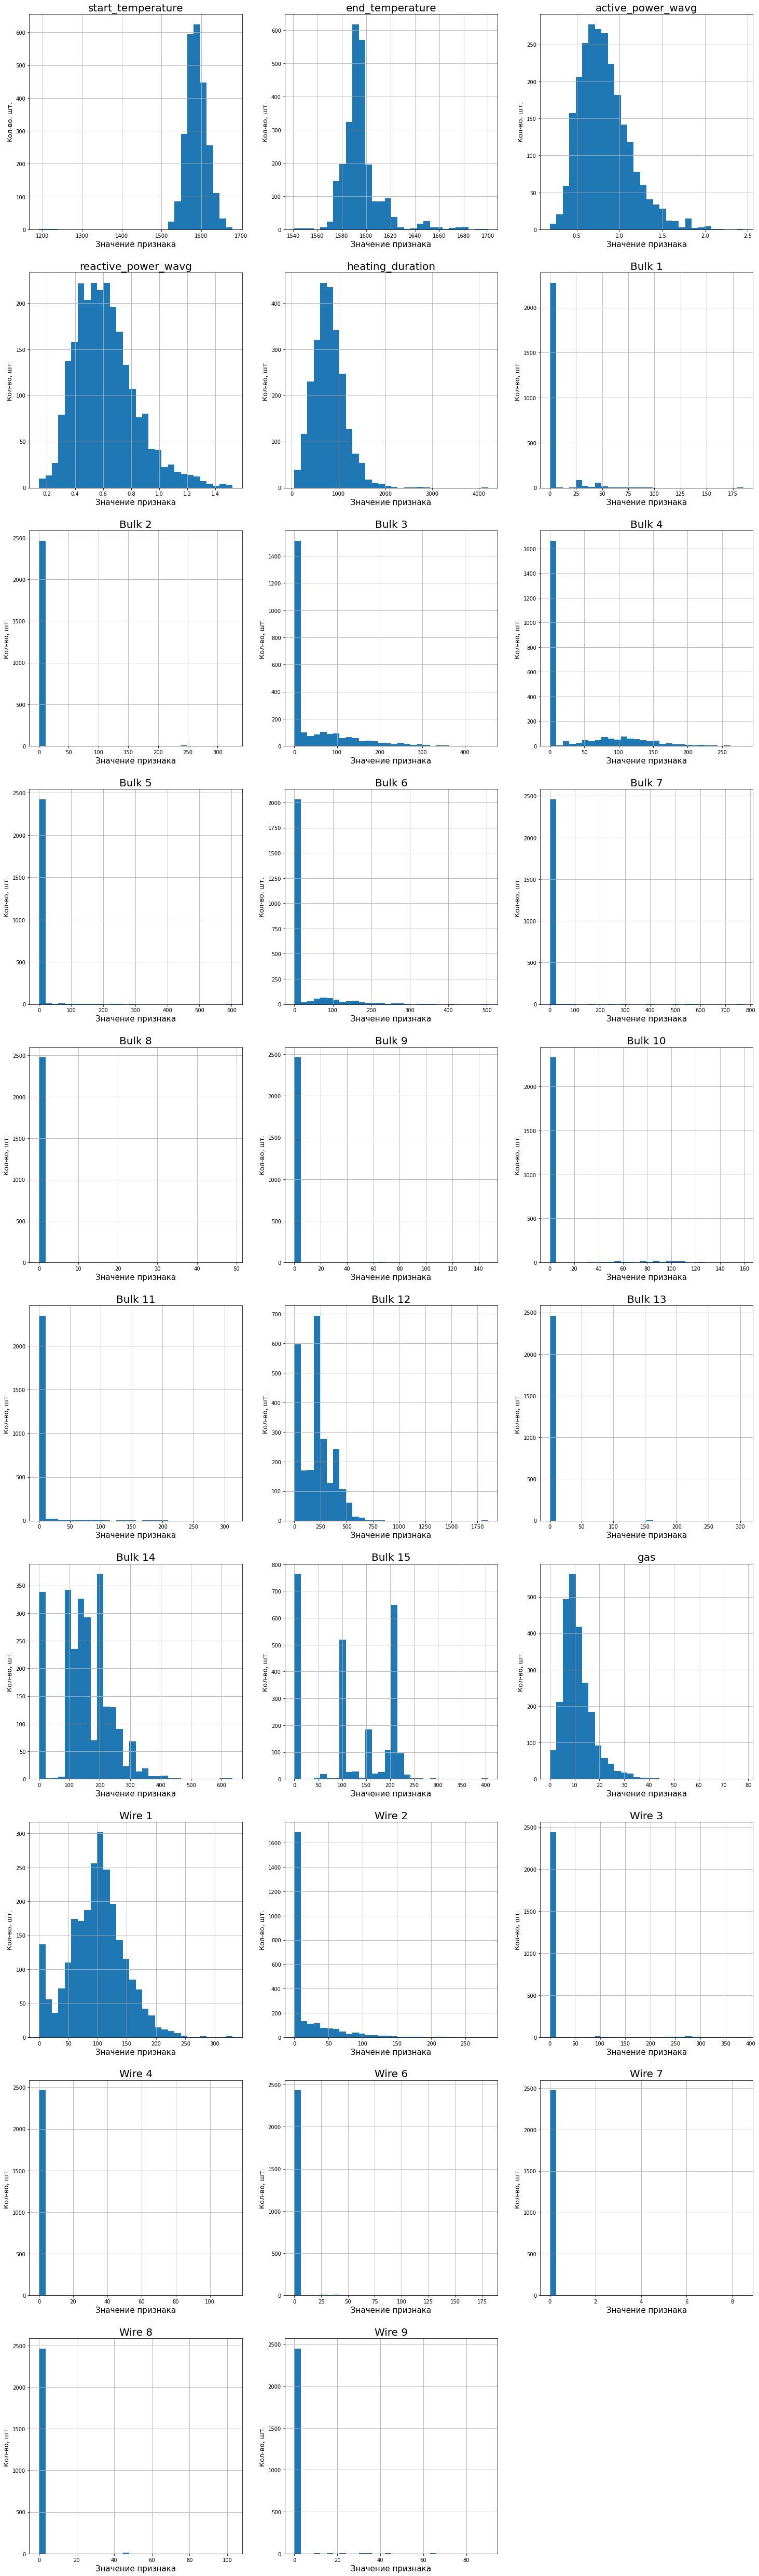

In [21]:
fig = plt.figure(figsize=(25, 90))

cols = 3
rows = math.ceil(len(data_final.columns) / cols) 
counter = 1
for column in data_final.columns:
    ax = plt.subplot(rows, cols, counter)
    plt.xlabel('Значение признака', fontsize=15)
    plt.ylabel('Кол-во, шт.', fontsize=13)
    ax.set_title(column, fontsize=20)
    data_final[column].hist(bins=30)
    counter += 1
plt.show();

Графики всех столбцов имеют адекватные распределения, что означает, что данные не содержат аномалии.

### Исследование на наличие мультиколлинеарности

Найдем такие пары признаков, у которых высокая взаимная корреляция (> 0.8).

In [22]:
corr_matrix_abs = data_final.corr().abs()

corr_cols = corr_matrix_abs.unstack()
corr_cols_sort = corr_cols.where((corr_cols >= 0) & (corr_cols < 1)).sort_values(kind="quicksort", ascending=False)

corr_cols_sort.head()

Wire 8               Bulk 9                 0.974976
Bulk 9               Wire 8                 0.974976
reactive_power_wavg  active_power_wavg      0.946311
active_power_wavg    reactive_power_wavg    0.946311
Wire 4               Bulk 7                 0.740254
dtype: float64

Высокую корреляцию имеют пары столбцов (`Wire 8`, `Bulk 9`) и (`active_power_awg` и `reactive_power_wavg`). Удалим из финального датафрейма столбцы `Wire 8` и `reactive_power_wavg`.

In [23]:
data_final.drop(columns=['Wire 8', 'reactive_power_wavg'], inplace=True)

### Вывод

Было проведено исследование масштаба количественных данных, и принято решение о масштабировании количественных данных в следущем Шаге после разбиения датасетов на обучающую, тестовую и валидационную выборки.

Было также проведено исследование на наличие мультиколлинеарности в финальном датасете, в результате которого были удалены столбцы `Wire 8` и `reactive_power_wavg` из-за их высокой коллинеарности с другими столбцами датасета.

## Обучение модели на предсказание признака `end_temperature`

Создадим переменные `features` (признаки) и `target` (целевой признак `end_temperature`) из датафрейма `data_final`.

In [24]:
target = data_final['end_temperature']
features = data_final.drop('end_temperature', axis=1)

Разделим датафрейм `data_final` на обучающую и тестовую выборки, и проверим доли выборок.

In [25]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345)

train_size = len(target_train) / len(target)
test_size = len(target_test) / len(target)


print('Доля обучающей выборки "data": {:.0%}'.format(train_size))
print('Доля тестовой выборки "data": {:.0%}'.format(test_size))

Доля обучающей выборки "data": 80%
Доля тестовой выборки "data": 20%


### Модель решающего дерева (`DecisionTreeRegressor`) 

В качестве алгоритма предсказания целевого признака выберем модель решающего дерева (`DecisionTreeRegressor`). Для начала необходимо произвести стандартизацию данных. Реализуем это с помощью контейнера `Pipeline()`, в котором последовательно стандартизируются данные, а затем предсказывается целевой признак на обработанных данных.

Создадим функцию, которая будет проделывать описанные выше шаги. Кросс-валидация будет заложена в `GridSearch` с помощью параметра `cv=4` внутри функции. В дальнейшем это облегчит обучение других моделей.

In [26]:
def tuned_model_regression(model, parameters, name_of_regressor):
    #Создадим экземпляры класса стандартизатора и классификатора
    scaler = StandardScaler()
    
    #Далее создаём массив последовательности «шагов» конвейера
    steps = [('normalizer', scaler), (name_of_regressor, model)]
    pipe = Pipeline(steps)

    mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

    #Укажем внутри `GridSearch` параметр кросс-валидации `cv` 
    grid_search = GridSearchCV(estimator=pipe, param_grid=parameters, scoring=mae_scorer, cv=4)
    return grid_search

Проверим качество обученной модели на тестовой выборке.

In [27]:
%%time

model_decision_tree = tuned_model_regression(
    model=DecisionTreeRegressor(random_state=12345),
    parameters={'decision_tree__max_depth': np.arange(1, 51),
               'decision_tree__min_samples_leaf': [1, 5, 10, 20, 50, 100]},
    name_of_regressor='decision_tree')

model_decision_tree.fit(features_train, target_train)
predictions_decision_tree = model_decision_tree.predict(features_test)

MAE_tree = mean_absolute_error(target_test, predictions_decision_tree)
print('Значение метрики MAE для модели решающего дерева: {:.2f}'.format(MAE_tree))

Значение метрики MAE для модели решающего дерева: 7.59
CPU times: user 18.8 s, sys: 23.7 ms, total: 18.8 s
Wall time: 18.7 s


Построим график рейтинга факторов по силе влияния на целевой признак.

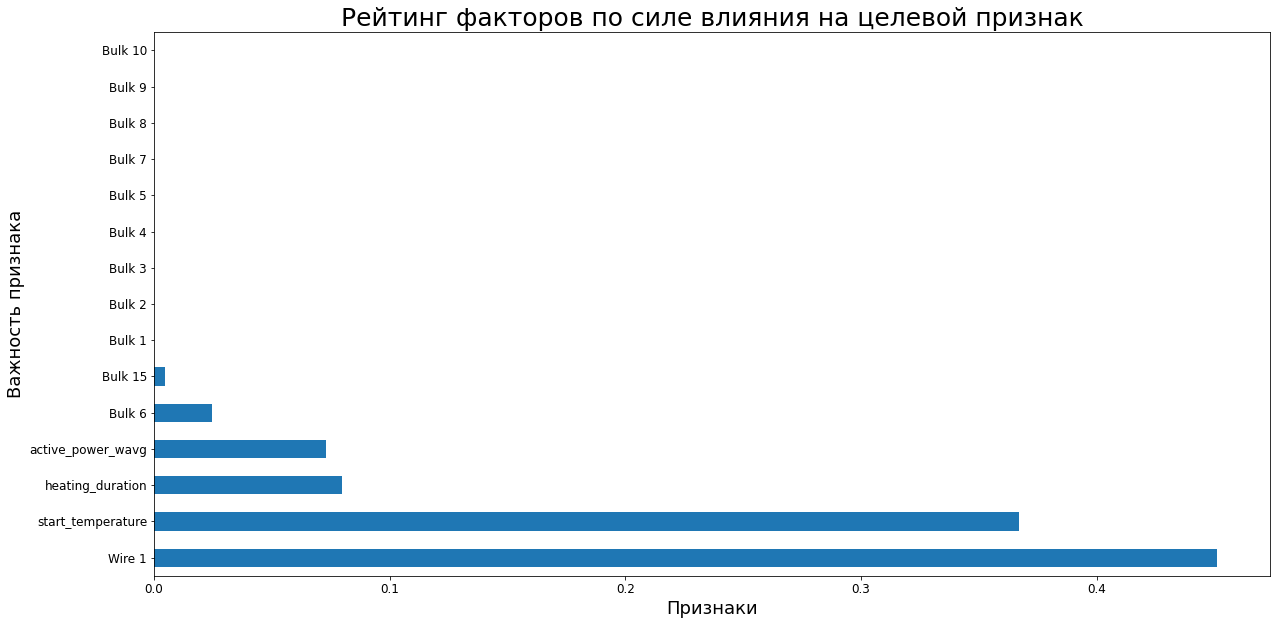

In [28]:
plt.title('Рейтинг факторов по силе влияния на целевой признак', fontsize=25)
(pd.Series(model_decision_tree.best_estimator_[1].feature_importances_, index=features_train.columns)
   .nlargest(15)
   .plot(kind='barh', figsize=(20, 10), fontsize=12))

plt.xlabel('Признаки', fontsize=18)
plt.ylabel('Важность признака', fontsize=18);

Заметим, что наиболее важными признаками для предсказания конечной температры являются (по убыванию): `Wire 1`, `start_temperature`, `heating_duration`, `active_power_wavg`, `Bulk 6` и `Bulk 15`. Поэтой причине обновим обучающую и тестовую выборки, удалив маловажные столбцы (все, кроме `Wire 1`, `start_temperature`, `heating_duration`, `active_power_wavg`, `Bulk 6`, `Bulk 15`).

In [29]:
for df in [features_train, features_test]:
    df.drop(df.columns.difference(['Wire 1',
                                   'start_temperature',
                                   'heating_duration',
                                   'active_power_wavg',
                                   'Bulk 6',
                                   'Bulk 15']), axis=1, inplace=True)

Обучим заново модель решающего дерева и посмотрим на результат.

In [30]:
%%time

model_decision_tree = tuned_model_regression(
    model=DecisionTreeRegressor(random_state=12345),
    parameters={'decision_tree__max_depth': np.arange(1, 51),
               'decision_tree__min_samples_leaf': [1, 5, 10, 20, 50, 100]},
    name_of_regressor='decision_tree')

model_decision_tree.fit(features_train, target_train)
predictions_decision_tree = model_decision_tree.predict(features_test)

MAE_tree = mean_absolute_error(target_test, predictions_decision_tree)
print('Значение метрики MAE для модели решающего дерева: {:.2f}'.format(MAE_tree))

Значение метрики MAE для модели решающего дерева: 7.37
CPU times: user 11.6 s, sys: 6.1 ms, total: 11.6 s
Wall time: 11.5 s


### Модель случайного леса (`RandomForestRegressor`) 

Обучим модель с помощью случайного леса (`RandomForestRegressor`). Аналогично предыдущему пункту сначала произведем стандартизацию данных, а затем обучим модель с помощью функции `tuned_model_regression()`.

In [31]:
%%time

model_random_forest = tuned_model_regression(
    model=RandomForestRegressor(random_state=12345),
    parameters={'random_forest__max_depth': np.arange(1, 51),
               'random_forest__n_estimators': [100, 200, 500, 1200]},
    name_of_regressor='random_forest')

model_random_forest.fit(features_train, target_train)
predictions_random_forest = model_random_forest.predict(features_test)

MAE_random_forest = mean_absolute_error(target_test, predictions_random_forest)
print('Значение метрики MAE для модели случайного леса: {:.2f}'.format(MAE_random_forest))

Значение метрики MAE для модели случайного леса: 6.61
CPU times: user 39min 42s, sys: 9.38 s, total: 39min 51s
Wall time: 39min 42s


Построим график рейтинга факторов по силе влияния на целевой признак.

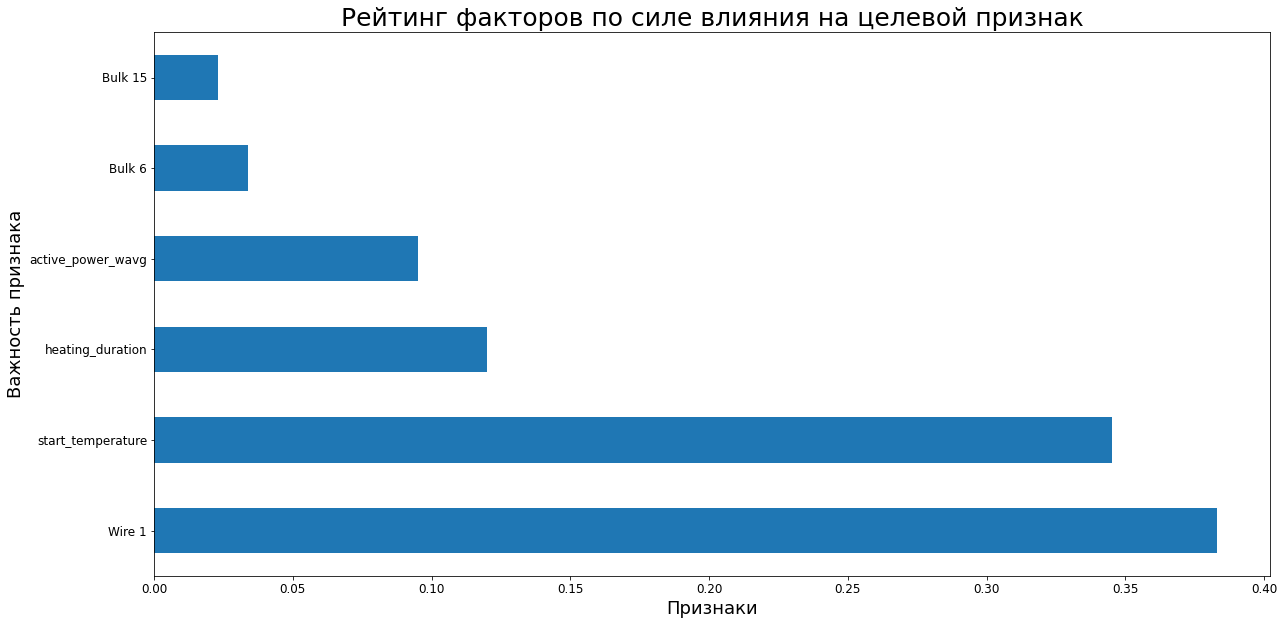

In [32]:
plt.title('Рейтинг факторов по силе влияния на целевой признак', fontsize=25)
(pd.Series(model_random_forest.best_estimator_[1].feature_importances_, index=features_train.columns)
   .nlargest(15)
   .plot(kind='barh', figsize=(20, 10), fontsize=12))

plt.xlabel('Признаки', fontsize=18)
plt.ylabel('Важность признака', fontsize=18);

### Модель градиентого бустинга (`LGBMRegressor`)

Обучим модель с помощью градиентного бустинга на обучающей выборке датафрейма `data_final`.

In [48]:
%%time

parameters={'max_depth': np.arange(1, 51),
            'n_estimators': [100, 200, 500, 1200],
            'boosting_type': ['rf'],
            'bagging_freq': [1],
            'bagging_fraction': [0.6],
            'metric': ['rmse'],
            'learning_rate': [0.001]}

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

model_lgbm = GridSearchCV(estimator=LGBMRegressor(random_state=12345), param_grid=parameters, scoring=mae_scorer, cv=4)
model_lgbm.fit(features_train, target_train)
predictions_lgbm = model_lgbm.predict(features_test)

MAE_lgbm = mean_absolute_error(target_test, predictions_lgbm)
print('Значение метрики MAE для модели градиентного бустинга: {:.2f}'.format(MAE_lgbm))

Значение метрики MAE для модели градиентного бустинга: 7.33
CPU times: user 10h 23min 50s, sys: 1min 35s, total: 10h 25min 25s
Wall time: 15min 39s


Построим график рейтинга факторов по силе влияния на целевой признак.

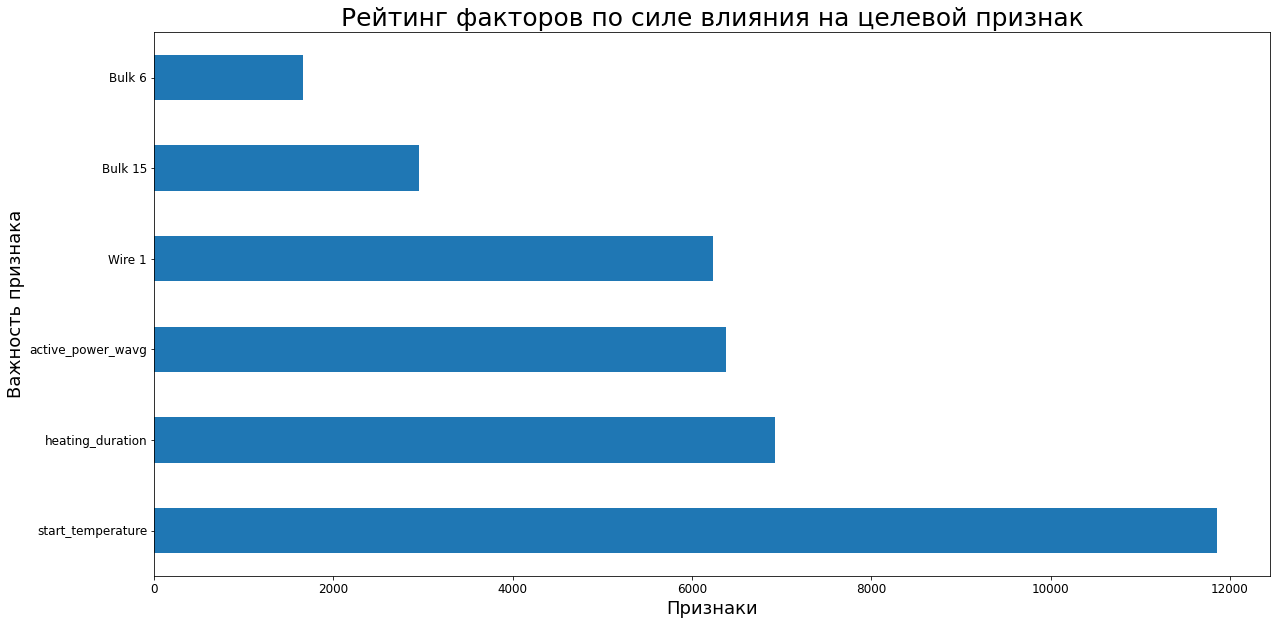

In [49]:
plt.title('Рейтинг факторов по силе влияния на целевой признак', fontsize=25)
(pd.Series(model_lgbm.best_estimator_.feature_importances_, index=features_train.columns)
   .nlargest(15)
   .plot(kind='barh', figsize=(20, 10), fontsize=12))

plt.xlabel('Признаки', fontsize=18)
plt.ylabel('Важность признака', fontsize=18);

## Аналитический отчет

В ходе проделанной работы были выполнены все этапы плана: предобработка данных, исследовательский анализ данных и обучение и выбор моделей.

Для обучения модели необходимо было объединить имеющиеся таблицы в одну финальную. Для объединения таблиц использовался метод `.join`, однако не все таблицы были включены в финальную: не были включены `data_bulk_time` и `data_wire_time`- данные таблицы содержали информацию о времени добавления того или иного сыпучего материала или проволочного материала, соответственно. Эти данные не понадобились, т.к. для построения модели учитывалось не время добавления легирующих материалов, а их общее количество, информация о котором содержалась в таблицах `data_bulk` и `data_wire`.

Информация о времени начала и конца нагрева сплава, а также активная и реактивная мощности содержалась в таблице `data_arc`. Было принято решение создать сводную таблицу `data_arc_pivot`, которая отражает средневзешенные значения активной и реактивной мощностей для каждой партии, где весами являются продолжительность нагрева. Это позволило включить информацию о мощности нагрева, а также продолжительности в финальную таблицу `data_final`.

Также в ходе подготовки данных обнаружилась следующая проблема - в таблице `data_temp` содержалось несколько значений температур для каждой партии. Целью данного проекта являлось предсказание последнего значения температуры. Поэтому было создана сводная таблица `data_temp_pivot`, которая содержала информацию о начальном и конечном значениях температуры для каждой партии сплава (`start_temperature` и `end_temperature`).

В финальный датафрейм `data_final` была включена информация из следующих таблиц: `data_arc_pivot`, `data_bulk`, `data_wire`, `data_gas` и `data_temp_pivot`. После объединения таблиц, была проведена предобработка данных: удаление дублей, предобработка пропущенных значений в столбцах, исследование на адекватность распределений количественных признаков и удаление аномальных значений. Также был проведено исследование на наличие мультиколлинеарности в данных финального датафрейма, в ходе которого выяснилось, что столбцы `Wire 8` и `reactive_power_wavg` сильно коррелировали с другими признаками, поэтому было принято решение удалить данные признаки. После проделанных этапов, описанных выше, данные были очищены и готовы для построения модели предсказания конечной температуры сплава `end_temperature`. Для этого были выбраны три алгоритма обучения: решающее дерево, случайный лес и градиентный бустинг. 

Наилучшее качество метрики демонстрирует модель случайного леса (МАЕ = 6,61), но в то же время данная модель дольше всего обучается (~40 мин.).

На втором месте по качеству и скорости обучения - модель, обученная с помощью градиентного бустинга (МАЕ = 7,33; 16 мин.)

В то время, как алгоритм решающего дерева уступает в качестве (МАЕ = 7,37), он значительно быстрее, чем модели градиентного бустинга и случайного леса (~12 сек.).

Было принято решение выбрать в качестве итоговой модель, обученную алгоритмом случайного леса. Значение итоговой метрики МАЕ - 6,61 (градуса). Поставленная задача выполнена.